In [1]:
import os
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython import display
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, UpSampling2D, concatenate

# ORGINAL

In [2]:
import os
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt
from IPython import display

In [3]:
BASE_DIR = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train'
N_TIMES_BEFORE = 4
record_id = '1704010292581573769'

with open(os.path.join(BASE_DIR, record_id, 'band_11.npy'), 'rb') as f:
    band11 = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'band_14.npy'), 'rb') as f:
    band14 = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'band_15.npy'), 'rb') as f:
    band15 = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'human_pixel_masks.npy'), 'rb') as f:
    human_pixel_mask = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'human_individual_masks.npy'), 'rb') as f:
    human_individual_mask = np.load(f)

In [4]:
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)

def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])

r = normalize_range(band15 - band14, _TDIFF_BOUNDS)
g = normalize_range(band14 - band11, _CLOUD_TOP_TDIFF_BOUNDS)
b = normalize_range(band14, _T11_BOUNDS)
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)

In [5]:
false_color[..., N_TIMES_BEFORE].shape

(256, 256, 3)

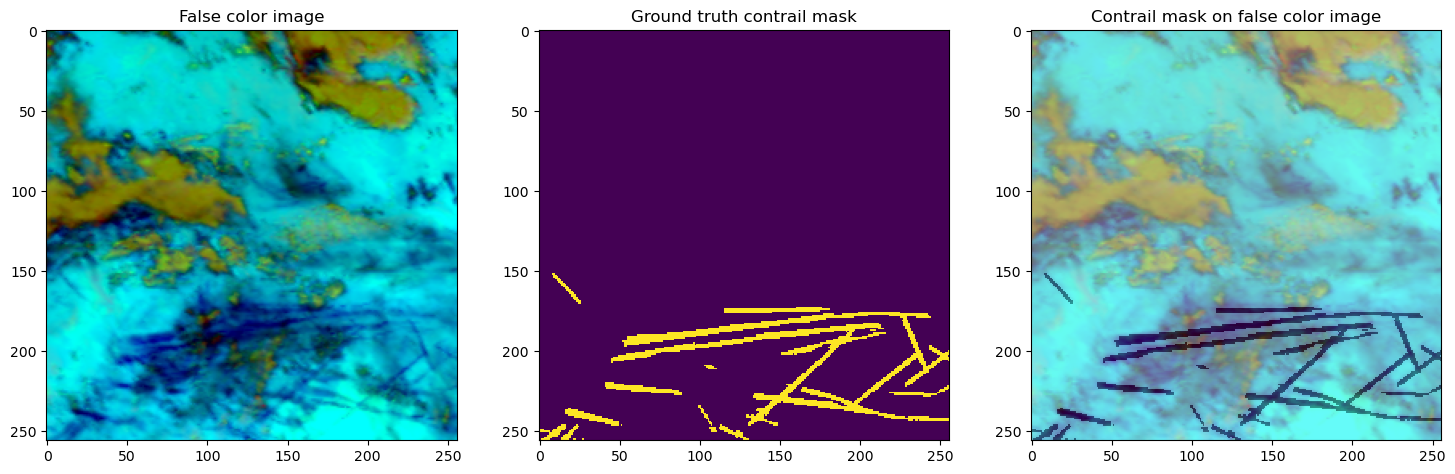

In [6]:
img = false_color[..., N_TIMES_BEFORE]

plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

ax = plt.subplot(1, 3, 2)
ax.imshow(human_pixel_mask, interpolation='none')
ax.set_title('Ground truth contrail mask')

ax = plt.subplot(1, 3, 3)
ax.imshow(img)
ax.imshow(human_pixel_mask, cmap='Reds', alpha=.4, interpolation='none')
ax.set_title('Contrail mask on false color image');

In [7]:
BASE_DIR = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train'
N_TIMES_BEFORE = 4
record_id = '1704010292581573769'

with open(os.path.join(BASE_DIR, record_id, 'band_11.npy'), 'rb') as f:
    band11 = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'band_14.npy'), 'rb') as f:
    band14 = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'band_15.npy'), 'rb') as f:
    band15 = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'human_pixel_masks.npy'), 'rb') as f:
    human_pixel_mask = np.load(f)
with open(os.path.join(BASE_DIR, record_id, 'human_individual_masks.npy'), 'rb') as f:
    human_individual_mask = np.load(f)

In [8]:
band_data = np.load('/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1704010292581573769/band_11.npy')
human_individual_masks = np.load('/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1704010292581573769/human_individual_masks.npy')
human_pixel_masks = np.load('/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1704010292581573769/human_pixel_masks.npy')

In [9]:
band_data.shape

(256, 256, 8)

In [10]:
type(band_data)

numpy.ndarray

In [11]:
band_data[:,:,0].shape

(256, 256)

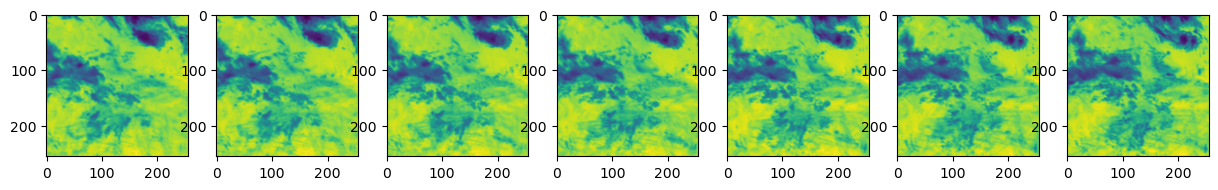

In [12]:
fig, ax = plt.subplots(1, 7, figsize=(15, 5))

ax[0].imshow(band_data[:,:,0])
ax[1].imshow(band_data[:,:,1])
ax[2].imshow(band_data[:,:,2])
ax[3].imshow(band_data[:,:,3])
ax[4].imshow(band_data[:,:,4])
ax[5].imshow(band_data[:,:,5])
ax[6].imshow(band_data[:,:,6])

plt.show()

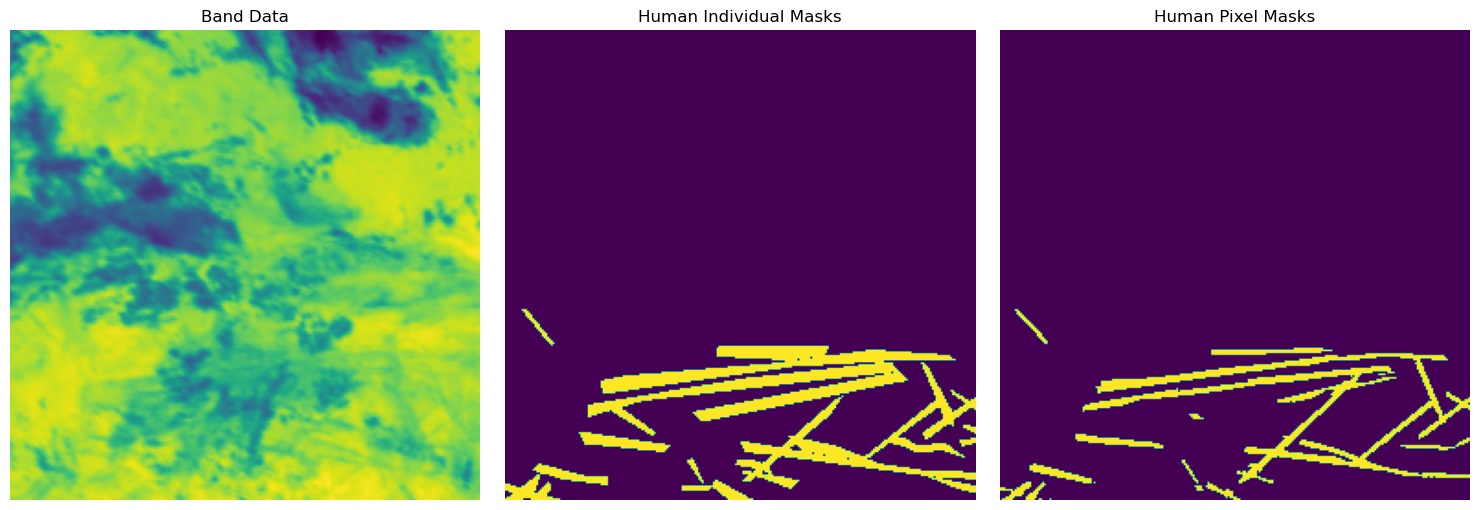

In [13]:


# Assuming n_times_before and n_times_after are constants
n_times_before = 4
n_times_after = 3

# Extract the labeled frame from the band data
labeled_frames = band_data[:, :, n_times_before]

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the band data
axes[0].imshow(labeled_frames)
axes[0].set_title('Band Data')
axes[0].axis('off')

# Plot the human individual masks
axes[1].imshow(human_individual_masks[:, :, 0, 0])  # Plotting the first labeler's mask
axes[1].set_title('Human Individual Masks')
axes[1].axis('off')

# Plot the human pixel masks
axes[2].imshow(human_pixel_masks[:, :, 0])
axes[2].set_title('Human Pixel Masks')
axes[2].axis('off')

plt.tight_layout()
plt.show()


In [14]:
labeled_frames.shape

(256, 256)

NameError: name 'FuncAnimation' is not defined

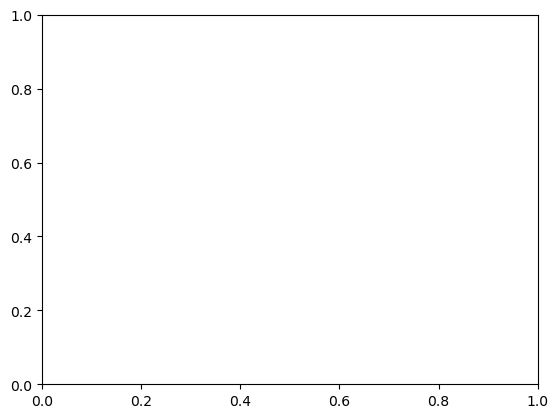

In [15]:

data_directory = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1704010292581573769'

band_8_data = np.load(os.path.join(data_directory, 'band_16.npy'))
band_8_data = (band_8_data - np.min(band_8_data)) / (np.max(band_8_data) - np.min(band_8_data))

n_times_before = 4
n_times_after = 3
T = n_times_before + 1 + n_times_after

fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    ax.imshow(band_8_data[:, :, frame], cmap='binary_r')
    ax.set_title(f'Frame {frame + 1}/{T}')
    ax.axis('off')

animation = FuncAnimation(fig, update, frames=T, interval=500)
display.HTML(animation.to_jshtml())


### Combine bands into a false color image
In order to view contrails in GOES, we use the "ash" color scheme. This color scheme was originally developed for viewing volcanic ash in the atmosphere but is also useful for viewing thin cirrus, including contrails. In this color scheme, contrails appear in the image as dark blue.

Note that we use a modified version of the ash color scheme here, developed by Kulik et al., which uses slightly different bands and bounds tuned for contrails.

References:
 - Ash Color Scheme (page 7): https://eumetrain.org/sites/default/files/2020-05/RGB_recipes.pdf

In [ ]:
_T11_BOUNDS = (243, 303)
_CLOUD_TOP_TDIFF_BOUNDS = (-4, 5)
_TDIFF_BOUNDS = (-4, 2)

def normalize_range(data, bounds):
    """Maps data to the range [0, 1]."""
    return (data - bounds[0]) / (bounds[1] - bounds[0])

r = normalize_range(band15 - band14, _TDIFF_BOUNDS)
g = normalize_range(band14 - band11, _CLOUD_TOP_TDIFF_BOUNDS)
b = normalize_range(band14, _T11_BOUNDS)
false_color = np.clip(np.stack([r, g, b], axis=2), 0, 1)

In [ ]:
img = false_color[..., N_TIMES_BEFORE]

plt.figure(figsize=(18, 6))
ax = plt.subplot(1, 3, 1)
ax.imshow(img)
ax.set_title('False color image')

ax = plt.subplot(1, 3, 2)
ax.imshow(human_pixel_mask, interpolation='none')
ax.set_title('Ground truth contrail mask')

ax = plt.subplot(1, 3, 3)
ax.imshow(img)
ax.imshow(human_pixel_mask, cmap='Reds', alpha=.4, interpolation='none')
ax.set_title('Contrail mask on false color image');

In [ ]:
# Individual human masks
n = human_individual_mask.shape[-1]
plt.figure(figsize=(16, 4))
for i in range(n):
    plt.subplot(1, n, i+1)
    plt.imshow(human_individual_mask[..., i], interpolation='none')

In [ ]:

def create_unet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    # Contracting Path (Downsampling)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Bottleneck
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    
    # Expansive Path (Upsampling)
    up4 = UpSampling2D(size=(2, 2))(conv3)
    up4 = Conv2D(128, 2, activation='relu', padding='same')(up4)
    merge4 = concatenate([conv2, up4], axis=3)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(merge4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
    
    up5 = UpSampling2D(size=(2, 2))(conv4)
    up5 = Conv2D(64, 2, activation='relu', padding='same')(up5)
    merge5 = concatenate([conv1, up5], axis=3)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(merge5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)
    
    # Output layer
    outputs = Conv2D(2, 1, activation='softmax')(conv5)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
# Define the paths to the numpy files
data_directory = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000216489776414077'
band_08_path = os.path.join(data_directory, 'band_08.npy')
individual_masks_path = os.path.join(data_directory, 'human_individual_masks.npy')
pixel_masks_path = os.path.join(data_directory, 'human_pixel_masks.npy')

# Load the numpy arrays
band_08_data = np.load(band_08_path)
individual_masks_data = np.load(individual_masks_path)
pixel_masks_data = np.load(pixel_masks_path)

# Get the shapes of the loaded numpy arrays
input_shape = band_08_data.shape  # Add channel dimension
num_classes = 2  # Number of classes (contrail and non-contrail)

# Create the U-Net model
model = create_unet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


In [ ]:
# Train the model
batch_size = 16
epochs = 20

# Train the model
history = model.fit(
    train_data, train_masks_categorical,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(val_data, val_masks_categorical)
)

In [ ]:
test_directory = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/test'

# List to store test data
test_data_list = []

# Loop through test directories and load data
for dir_name in os.listdir(test_directory):
    dir_path = os.path.join(test_directory, dir_name)
    if os.path.isdir(dir_path):
        test_band_08_path = os.path.join(dir_path, 'band_08.npy')
        
        if os.path.exists(test_band_08_path):
            test_band_08_data = np.load(test_band_08_path)
            test_data_list.append(test_band_08_data)

# Convert list to numpy array
test_contrail_time_series = np.array(test_data_list)

# Normalize test data
normalized_test_contrail_data = (test_contrail_time_series - np.min(test_contrail_time_series)) / (np.max(test_contrail_time_series) - np.min(test_contrail_time_series))

# Evaluate the model on the test data
test_predictions = model.predict(normalized_test_contrail_data)

In [ ]:
test_predictions.shape

In [ ]:
print("Prediction",test_predictions[0].shape)
print("Band",np.load("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000216489776414077/band_08.npy").shape)
print("Human Individual",np.load("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000216489776414077/human_individual_masks.npy").shape)
print("Human pixel",np.load("/kaggle/input/google-research-identify-contrails-reduce-global-warming/train/1000216489776414077/human_pixel_masks.npy").shape)

In [ ]:
a.shape

In [ ]:
# Define the threshold value
threshold = 0.5  # You can adjust this threshold value based on your needs

# Apply thresholding to generate binary predictions
binary_test_predictions = (test_predictions > threshold).astype(np.uint8)

In [ ]:
binary_test_predictions[0].shape

# Libraries

In [ ]:
import os
import pickle
import numpy as np
import random
from tqdm.auto import tqdm # to show progress bar
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# **Directories**

# Creating u-net model

In [ ]:
def create_unet(input_shape, num_classes):
    inputs = Input(input_shape)
    
    # Encoder
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    # Middle
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    
    # Decoder
    up4 = UpSampling2D(size=(2, 2))(conv3)
    concat4 = concatenate([conv2, up4], axis=-1)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(concat4)
    conv4 = Conv2D(128, 3, activation='relu', padding='same')(conv4)
    
    up5 = UpSampling2D(size=(2, 2))(conv4)
    concat5 = concatenate([conv1, up5], axis=-1)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(concat5)
    conv5 = Conv2D(64, 3, activation='relu', padding='same')(conv5)
    
    # Output layer
    outputs = Conv2D(1, 1, activation='sigmoid')(conv5)    
    model = Model(inputs, outputs)
    return model

In [ ]:
input_shape = (256, 256, 3)  # Adjust based on your data
num_classes = 1  # Binary classification (contrail vs. non-contrail)

# Create the U-Net model
model = create_unet(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

# Train the model using pre-processed data

In [ ]:
data_dir='/kaggle/input/contrails-ash-color-dataset/contrails'
all_files = os.listdir(data_dir)

train_files, valid_files = train_test_split(all_files, test_size=0.2, random_state=42)

In [ ]:
def seperate_data(ids):
    img = []
    mask = []
    for i in tqdm(ids):
        path = '/kaggle/input/contrails-ash-color-dataset/contrails/' + str(i)
        data = np.load(path)
        img.append(data[:, :, :3])
        mask.append(data[:, :, 3:])
    return img, mask

In [ ]:
train_contrail , train_mask = seperate_data(train_files)
valid_contrail , valid_mask = seperate_data(valid_files)

In [ ]:
print(train_contrail[0].shape)
print(train_mask[0].shape)
print(valid_contrail[0].shape)
print(valid_mask[0].shape)

In [ ]:
train_contrail =np.array(train_contrail)
train_mask = np.array(train_mask)
valid_contrail=np.array(valid_contrail)
valid_mask=np.array(valid_mask)

In [ ]:
np.save('train_contrail.npy', train_contrail)
np.save('train_mask.npy', train_mask)
np.save('valid_contrail.npy', valid_contrail)
np.save('valid_mask.npy', valid_mask)

In [ ]:
# Define the number of epochs and batch size
epochs = 15
batch_size = 16

# Train the model
history = model.fit(train_contrail, train_mask, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(valid_contrail, valid_mask))

# Evaluate the model 

# Test the model

In [ ]:
# Set the directory path for the test data
test_data_directory = '/kaggle/input/google-research-identify-contrails-reduce-global-warming/test'

# Preprocess the test data
preprocessed_test_data = preprocess_test_data(test_data_directory)

# Print the shape of the preprocessed test data
print("Preprocessed Test Data Shape:", preprocessed_test_data.shape)

In [ ]:
predicted_masks = model.predict(preprocessed_test_data)

In [ ]:
threshold = 0.5
binary_predicted_masks = (predicted_masks > threshold).astype(np.uint8)

In [ ]:
accuracy = accuracy_score(flat_ground_truth, flat_predictions)
precision = precision_score(flat_ground_truth, flat_predictions)
recall = recall_score(flat_ground_truth, flat_predictions)
f1 = f1_score(flat_ground_truth, flat_predictions)